# 환율

## 실습 
####    : 환율 추이 분석

#### 참고: https://fred.stlouisfed.org/

In [1]:
import pandas_datareader as pdr
import FinanceDataReader as fdr # 한국 주식 /미국 주식/ 지수 / 환율 / 암호화폐 등 금융 데이터 수집 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from functools import reduce
import warnings
from sklearn.preprocessing import StandardScaler

warnings.filterwarnings(action='ignore')
plt.rc('font', family='NanumGothic')

In [2]:
def ViewChart(df, what=None, size = None):
    p_figsize = (10,6)
    h_figsize = (8,4)
    
    if size:
        p_figsize = size; h_figsize = size
    if what=='p':
        df.plot(figsize=p_figsize, grid=True)
    
    if what=='corr': # what: corr
        plt.figure(figsize=h_figsize)
        sns.heatmap(df.corr(), cmap='YlGnBu')

In [3]:
def Makedata(*args,src='fred',start='1995-01-01',end=None,col=None, c='on'):
    df = pdr.DataReader(args,src,start,end)
    if col:
        df.columns = col
    if c == 'on':
        ViewChart(df,'p')
    return df

In [4]:
def Make_RateOfChange(df,cols,dropORG='T'): # 변동률
    for col in cols:
        df[f'{col}_변동률'] = (df[col]-df[col].shift()) / (df[col].shift()) * 100
        
        if dropORG == 'T':
            df.drop(col,axis=1,inplace=True)

## 원자재코드

In [5]:
# 'GOLDAMGBD228NLBM' # 금 -- DAILY DATA
# 'PCOPPUSDM' # 구리
# 'POILWTIUSDM', 'POILDUBUSDM', 'POILBREUSDM'  # WTI, DUBAI, BRENT

# 1. 원자재 가격 변동과 환율 

- 데이터수집

In [6]:
oil_cols = ['WTI','DUBAI','BRENT']
oil = Makedata('POILWTIUSDM','POILDUBUSDM','POILBREUSDM',col=oil_cols,c='off')

In [7]:
won_cols = ['원/달러']
Wondollar = Makedata('EXKOUS',col=won_cols,c='n')

In [8]:
df = pd.read_csv('ECOS_기준금리_생산자물가지수.csv')
df.set_index('DATE',inplace=True) 
df.index = pd.to_datetime(df.index)

In [9]:
# 데이터 병합
dfs = [oil, Wondollar,df]
data = reduce(lambda left, right: pd.merge(left, right, on='DATE'), dfs)

In [10]:
data.head()

,WTI,DUBAI,BRENT,원/달러,기준금리_한국,기준금리_미국,생산자물가지수_한국,생산자물가지수_미국
DATE,,,,,,,,
1995-01-01,18.02,16.08,16.55,793.0750,NaN,5.5,65.98,68.06
1995-02-01,18.55,16.64,17.14,793.1947,NaN,6.0,66.23,68.39
1995-03-01,18.55,16.49,17.02,781.8130,NaN,6.0,66.71,68.61
1995-04-01,19.91,17.65,18.74,770.6100,NaN,6.0,67.11,69.00
1995-05-01,19.73,17.24,18.32,764.4318,NaN,6.0,67.33,69.17


- 데이터 정규화  StandardScaler

In [11]:
# 데이터 정규화 
scaler=StandardScaler()
scaler.fit(data)
scaled=scaler.transform(data)
data = pd.DataFrame(data = scaled, index=data.index, columns=data.columns.to_list())

In [12]:
data

,WTI,DUBAI,BRENT,원/달러,기준금리_한국,기준금리_미국,생산자물가지수_한국,생산자물가지수_미국
DATE,,,,,,,,
1995-01-01,-1.220116,-1.162274,-1.189256,-2.103375,NaN,1.394342,-1.760890,-1.418948
1995-02-01,-1.201496,-1.144435,-1.170912,-2.102577,NaN,1.618258,-1.743455,-1.399623
1995-03-01,-1.201496,-1.149214,-1.174643,-2.178459,NaN,1.618258,-1.709979,-1.386739
1995-04-01,-1.153718,-1.112262,-1.121168,-2.253149,NaN,1.618258,-1.682083,-1.363899
1995-05-01,-1.160041,-1.125322,-1.134226,-2.294339,NaN,1.618258,-1.666740,-1.353943
...,...,...,...,...,...,...,...,...
2020-12-01,-0.198713,-0.103525,-0.153818,-0.098531,-1.784995,-1.012762,1.108965,NaN
2021-01-01,-0.028464,0.044666,-0.007784,-0.068869,-1.784995,-1.012762,NaN,NaN
2021-02-01,0.222408,0.248456,0.222658,0.021649,-1.784995,-1.012762,NaN,NaN


- 변동률 확인

In [13]:
cols = data.columns.to_list() # 변동률로 비교하려했더니, 더 비교 불가. 스케일 차가 커 그래프 알아볼 수 없음.
Make_RateOfChange(data,cols,'F')

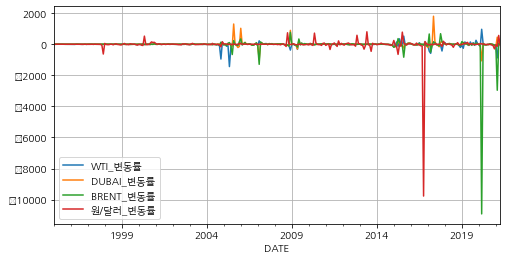

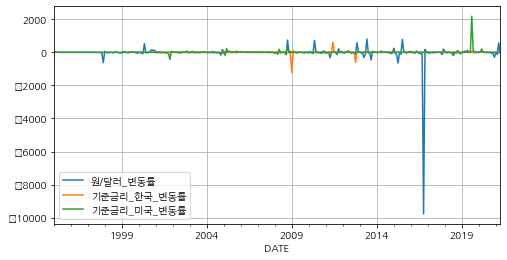

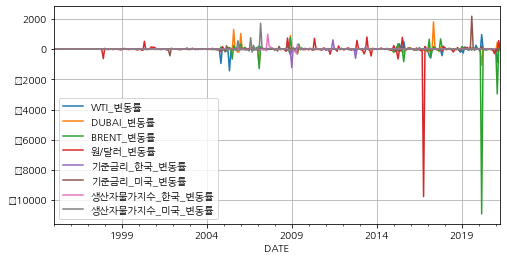

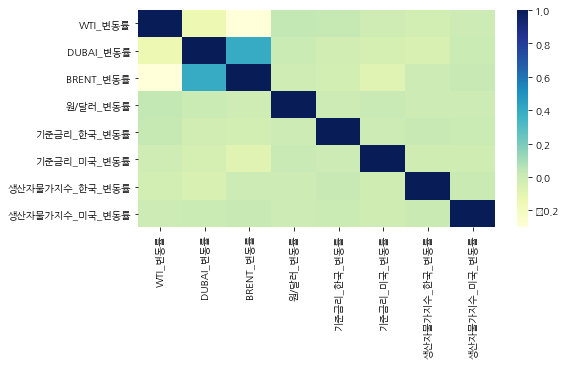

In [14]:
change_cols = ['WTI_변동률', 'DUBAI_변동률', 'BRENT_변동률', '원/달러_변동률', '기준금리_한국_변동률', '기준금리_미국_변동률',
                '생산자물가지수_한국_변동률', '생산자물가지수_미국_변동률']

ViewChart(data[['WTI_변동률', 'DUBAI_변동률', 'BRENT_변동률', '원/달러_변동률']],'p',size=(8,4))
ViewChart(data[[ '원/달러_변동률', '기준금리_한국_변동률', '기준금리_미국_변동률']],'p',size=(8,4))
ViewChart(data[change_cols],'p',size=(8,4))
ViewChart(data[change_cols],'corr')

In [45]:
# 변동률 데이터 확인사항 ----------
# 환율과 유가는 강한 음의 상관관계를 갖고 있다.
# 유가 3종목은 강한 양의 상관관계를 가지며, 특히 BRENT-DUBAI는 더욱 유사한 움직임을 보인다.
# 변동률로 비교 어려움 -> drop 

In [16]:
data.drop(change_cols,axis=1,inplace=True)

- 변동률 X

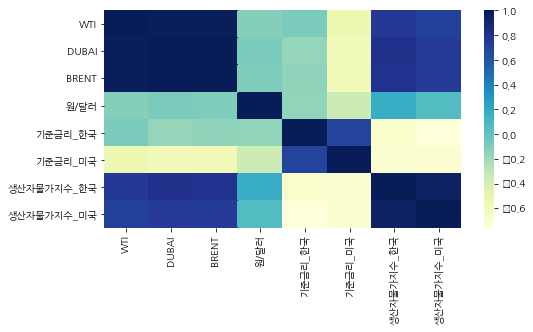

In [17]:
# 상관관계
ViewChart(data,'corr') 

- 유가-생산자물가지수 : 강한 양의 상관관계 ( 유가 상승 & 생산자물가지수 상승)
- 유가-미국금리 : 강한 음의 상관 (유가 상승 & 미국금리 하락)
- 생산자물가지수-금리 : 강한 음의 상관 (생물 상승 & 금리 하락)
- 한국금리-미국금리 : 양의 상관(미국금리 상승 먼저& 한국금리 상승)

In [ ]:
# ViewChart(data, 'p') # 무시 - log 기준 -- 차트 위에서부터: 환율 1종 , 생산자물가지수 2종, 유가 3종, 금리 2종

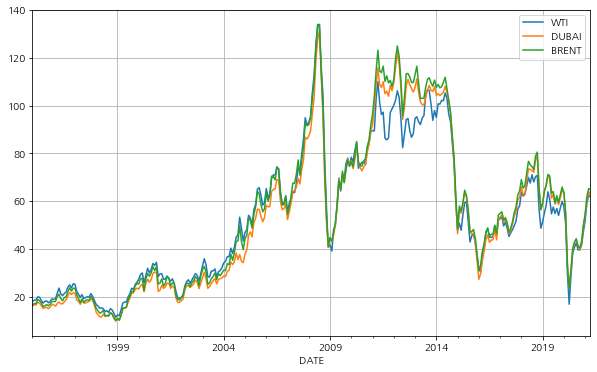

In [46]:
# ViewChart(oil,'p') # 유가

# 유가와 환율만 보았을 때,
< 유가 >
- 1) 유가 3종목은 거의 같이 움직임.
- 2) 1997년 후반부터 유가가 대폭 하락, 1990년 급등, 이후 2008년 하락직전까지 고공행진
- 3) 2008년 중반이후 급락, 2015년까지 차츰 
- 4) 2014년 중후반 기점으로 유가 폭락(셰일가스)
- 5) 2020년 초 유가 폭락, 다시 회복(유가 마이너스 찍었던 지점)

< 환율 > 
- 1) 1997년 초 900 수준 -> 1998년 초 2000까지 폭등(API 데이터는 max 1707) -> 이후 2001년 IMF 자금 상환시기까지 차츰 회복
- 2) 2001-2003년 환율 들썩했으나 2008년까지 차츰 하락(환율하락 - 달러약세 - 원화강세 - 수출X)
- 3) 2008년 이후 900언저리에서 1400쯤까지 폭등

< 금리 >
- 1) 미: 2007년부터 금리 인하하기 시작 ---> 2008년 이후 크게 낮춤 / 한국: 같은 시기 금리 인하

## 세분화 : 차트 1 - 유가&환율

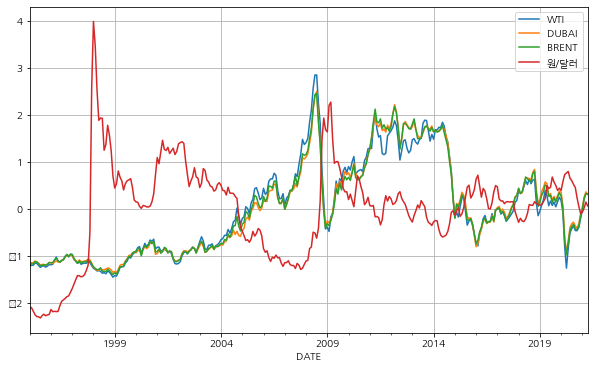

In [20]:
ViewChart(data[['WTI', 'DUBAI', 'BRENT', '원/달러']],'p')

# 환율이 오를때 유가는 떨어지고, 환율이 내려갈때 유가가 오르는 것처럼 보인다.
# 2008년 환율-유가 모두 오르나, 이후 환율 폭등-유가 폭략, 이외의 시점에서도 같은 양상. 대체로 반대로 움직인다 보면 되는가?
# BUT 일반적:환율이 오를때 원자재(유가)도 오른다? 내리는 경우는 국제 정세 따라서? 
# (그렇다고 하기엔 너무 반대로 보이는데, 시간차?) --- 다시보니 한두블록 차이로 그런 느낌도.. 원유 오른다-달러사용-달러부족-환율상승?
# -> 다른 원자재도 확인해봐야 할 듯 싶다. 

## 세분화 : 차트 2 - 유가&생산자물가

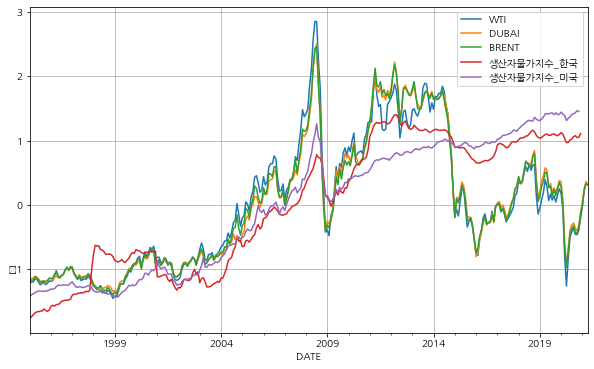

In [21]:
ViewChart(data[['WTI', 'DUBAI', 'BRENT', '생산자물가지수_한국','생산자물가지수_미국']],'p')

# [1] 1997년~1999년 유가는 하락추세. BUT 한국의 생산자물가지수는 큰폭으로 올랐다. 
# 이유 -> IMF로 국가부도, 외환 부족, 환율 오름 1달러에 1000원->1달러에 2000원(달러 강세-원화약세) 
# -> 원유는 달러로 구매-> 원유를 원자재로 사용해 물건을 만드는 기업은 부담 상승 (미국은 그닥 타격 없음)
# [2] 이후 안정을 찾는 듯 했으나, 2002년 이후 유가 우주로 치솟! 한국미국 할것 없이 생산자물가도 같이 오름
# (2008년 리먼브라더스 사태 이후 폭락하며 잠시 가라앉음. 이후 2014년 셰일혁명 직전까지 또 치솟음. 한국은 영향 많이 받음)
# [3] 2014년 중반 이후 유가는 거의 반값이 되었으나 생산자물가는 큰 변화가 없이 꾸준히 상승 추세를 보임. ---이유?? 다른 원자재?
# 한국은 유가의 변동에 영향을 많이 받았다.

## 세분화 : 차트 3 - 환율&금리

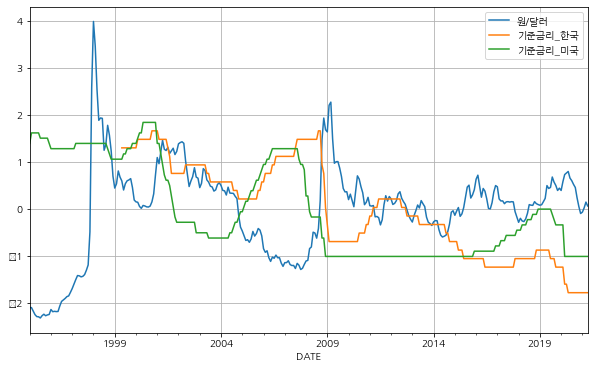

In [22]:
ViewChart(data[[ '원/달러', '기준금리_한국', '기준금리_미국']],'p') 
# 둘다 중앙은행 정책금리(우리나라 기준금리, 미국 정책금리-우리나라꺼만 얘기하면 기준금리)

## 강사님 코멘
- 환율 오른다 -> (미국) (자국화폐) 기준금리 내린다-> 우리도 내림(우리나라 원화가 올라가면 안되니까)
- 환율 오름(달러가 시장에 적음) -> 기준금리 내린다(미국) : 은행에 두지말아라. 이자 안준다. 시장에 돈 풀어라

# 2. 아시아 금융위기
- ref : 
    - https://ko.wikipedia.org/wiki/%EC%95%84%EC%8B%9C%EC%95%84_%EA%B8%88%EC%9C%B5_%EC%9C%84%EA%B8%B0
    - https://namu.wiki/w/1997%EB%85%84%20%EC%99%B8%ED%99%98%20%EC%9C%84%EA%B8%B0?from=%EC%95%84%EC%8B%9C%EC%95%84%20%EA%B8%88%EC%9C%B5%20%EC%9C%84%EA%B8%B0

<pre>
◈ 배경 : 
    - 바트화는 당시 25바트가 1달러로 고정
    - 인플레이션은 3.4에서 5.7%의 낮은 수준으로 안정적으로 유지되던 상태
    - 1997년 5월 14-15일, 태국 바트는 대규모 투기 공격을 받음. (해지펀드+외환딜러가 수십억 바트 매도)
    - 1997년 6월 30일, 태국 장관 차왈릿은 태국 밧을 평가절하하지 않겠다고 했으나, (외환보유액으로 방어)
    - 하지만 고정환율제를 유지할 외환보유금 부족으로, 1997년 7월 2일, 고정환율제를 포기함. 
        (태국 밧의 가치가 외환시장에 의해 결정)
    
◈ 영향 :
    - 태국 : 
        - 각종 분야 대량 해고 -> 태국의 고성장 중단
        - 밧 평가절하 - 50% 이상 가치 하락 (1998년 1월, 56밧/1달러로 환율의 최고점)
        - 태국 주식 시장은 75% 하락
        
    - 한국 :
        - (1996년도의 경제성장률: 9.6% -> 7.6% : 수출액 감소, 대외채무 폭증 등)
        - 1997년 이후 기업 연쇄부도
        - 외국자본의 급격한 유출이 발생(외환보유고 바닥)
        - 12월에는 환율이 1달러 당 2천원으로 폭등
        - 1997년 12월 3일부터 IMF체제가 시작, 1998년에는 대량실업사태
        - 2001년 8월 23일, 1억 4천만 달러를 상환했으나 계속된 경제 불황
     
    - 참고 : 
        - 1997년 1월 미국에서 금리 인상 -> 미국 내수 일시 축소, 미국의 대외수입이 감소
        - 특히 수출을 늘리고자 자국의 화폐를 평가절하 시키는 순간 갚아야 할 돈이 더더욱 늘어나는 악재
        (달러 강세 - 원화 약세 - 1달러 1000원->1달러 2000원 -> 2배로 갚아야 함)

# 필요한 데이터 : 
- 환율 정보 : 태국 밧/달러, 한국 원/달러
- 소비자물가지수 ----------------경제 불황 확인
- 소비심리-----------------------경제 불황 확인
- 기준금리(한국,미국)
- 외국인 선물국채 거래량 -------------------외국자본 유출 확인
- 경상수지
- 외환보유액 ----------ECOS 18.1.3.6
- 외국인 주식 거래량 ------- ECOS 6.1.3 투자자별 주식거래   외국인(순매수) 3)

# ------------------------------------------------------------------------

- 데이터 수집

In [23]:
# 환율
exchange = Makedata('EXKOUS','EXTHUS',col=['원/달러','밧/달러'],c='F')

In [24]:
# 외환보유액, 외국인 주식 순매수 거래량
외환_주식외인매수 = pd.read_csv('ECOS_외환보유액_외국인주식순매수.csv',thousands=',')
외환_주식외인매수.set_index('DATE',inplace=True) 
외환_주식외인매수.index = pd.to_datetime(외환_주식외인매수.index)

In [25]:
# 소비자물가지수, 소비자심리지수
소비자지수 = pd.read_csv('ECOS_소비자물가지수_소비자심리지수.csv')
소비자지수.set_index('DATE',inplace=True) 
소비자지수.index = pd.to_datetime(소비자지수.index)

In [26]:
# 중앙은행 정책금리(한, 미)
df = pd.read_csv('ECOS_기준금리_생산자물가지수.csv')
df.set_index('DATE',inplace=True) 
df.index = pd.to_datetime(df.index)
기준금리 = df[['기준금리_한국','기준금리_미국']]

In [27]:
# 데이터 통합
dfs = [exchange, 기준금리,외환_주식외인매수,소비자지수]
data = reduce(lambda left, right: pd.merge(left, right, on='DATE'), dfs)

- 데이터 정규화 StandardScaling

In [29]:
# 데이터 정규화 
scaler=StandardScaler()
scaler.fit(data)
scaled=scaler.transform(data)
data = pd.DataFrame(data = scaled, index=data.index, columns=data.columns.to_list())

In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 315 entries, 1995-01-01 to 2021-03-01
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   원/달러             315 non-null    float64
 1   밧/달러             315 non-null    float64
 2   기준금리_한국          263 non-null    float64
 3   기준금리_미국          315 non-null    float64
 4   외환보유액(백만달러)      195 non-null    float64
 5   외국인_주식_순매수(천주 )  207 non-null    float64
 6   소비자심리지수          153 non-null    float64
 7   소비자물가지수_한국       315 non-null    float64
 8   소비자물가지수_미국       315 non-null    float64
dtypes: float64(9)
memory usage: 24.6 KB


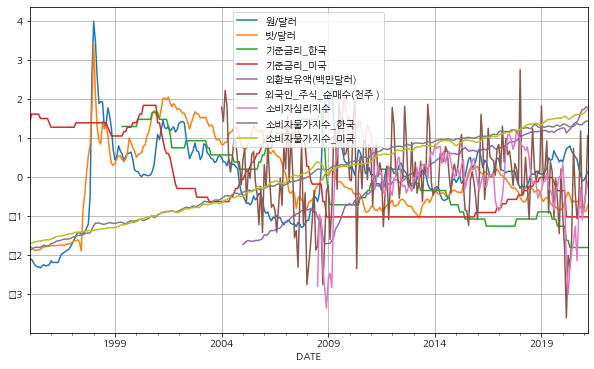

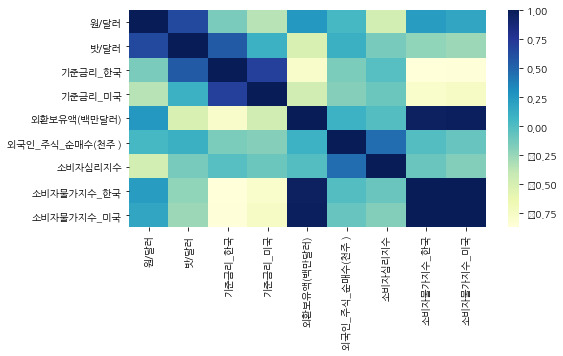

In [39]:
# 전체데이터
ViewChart(data, 'p')
ViewChart(data, 'corr')

상관관계표만 보면,
- 외환보유액 & 소비자물가지수
- 원 & 밧 환율
- 한 기준금리 & 밧 환율 ----?
- 기준금리 (한,미) -- 미국 금리 오를때 한국도 오르는 경향. 따라감
- 소비자심리 & 외환보유액
- 환율 & 외환보유액 

## 환율
- ( feat : 아시아 경제위기 같이 겪은(+서브프라임 사태) 한국과 태국은 비슷한 환율 추세 )

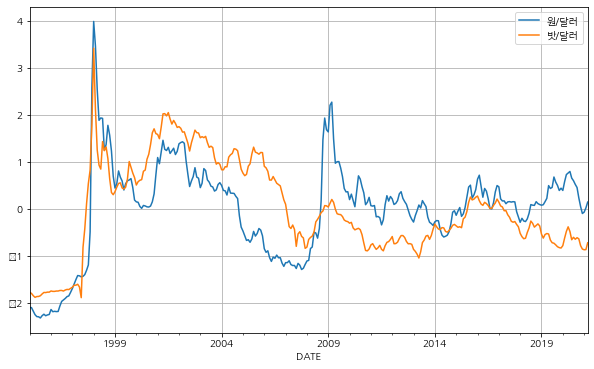

In [32]:
ViewChart(data[['원/달러','밧/달러']], 'p')

## 한국 경제 위기

## 세분화 : 환율 & 외환보유액

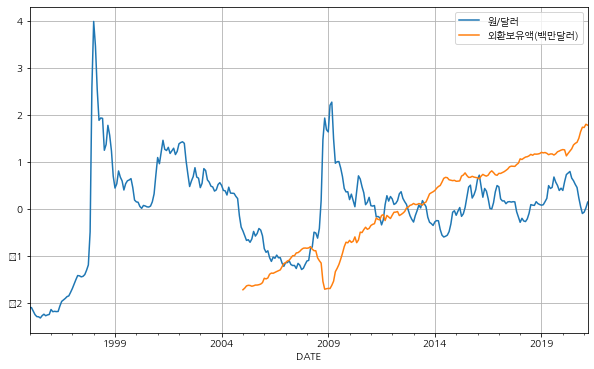

In [33]:
ViewChart(data[['원/달러','외환보유액(백만달러)']],'p')
# imf 시기의 외환보유액 데이터가 없다(ECOS) 아쉽
# 의외로 2008년 서브프라임 사태로 2009년 바닥난 이후로는 꾸준히 외환보유고를 채워가는중(경상수지 흑자! 다른 지표로 추가 확인)

## 세분화 : 환율 & 외국인 주식거래

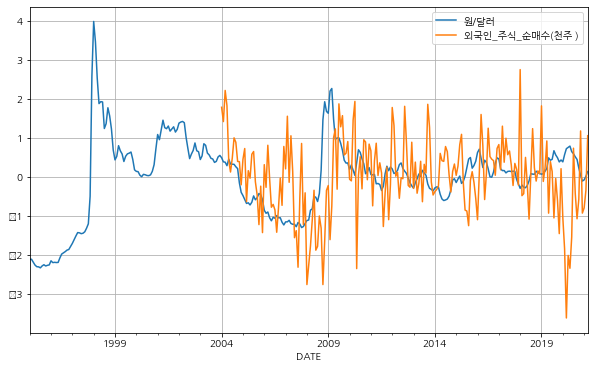

In [34]:
ViewChart(data[['원/달러','외국인_주식_순매수(천주 )']],'p')
# 2008년과 2020년 외국인들 주식 죄다 매도 ( 2020년은 특히 타격을 받았을 것 같은데, 위 외환보유액 차트에선 안전빵인 상태!문제없음)

## 세분화 : 금리 & 소비자지수 

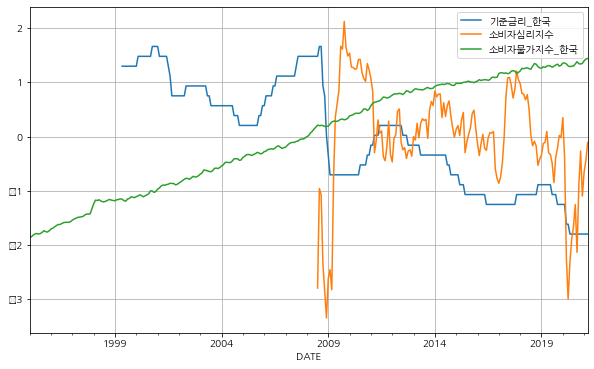

In [42]:
ViewChart(data[['기준금리_한국','소비자심리지수','소비자물가지수_한국']],'p')
# 소비자 심리 - 2008-2009(리먼사태), 2020년(코로나) 크게 위축 상태 (이후 다음해 더 큰 폭 상승)
# 소비자 물가지수 - 1997년 후반, 2008년, 2011-12년 이외는 생각보다 평평하게 꾸준히 올랐다. 
# -> (차트만 봐서는 환율 유가에 직접적 영향을 받지 않은 것으로 보인다--경상수지 확인) ------ 위에 생산자물가지수 차트를 확인해야 함.

# 결론

1. 환율 ↑ ----- USA: 정책금리 ↓ (KR: 기준금리 ↓) 
2. 환율 ↑ ----- 유가 ↓
3. 유가(원자재) ↑ ----- 생산자물가지수 ↑